In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (4,098 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 불러오기
student_ai = pd.read_csv('student-AI.csv')
student_computer = pd.read_csv('student-Computer.csv')

# 전공 컬럼 추가
student_ai['major'] = 'AI'
student_computer['major'] = 'Computer'

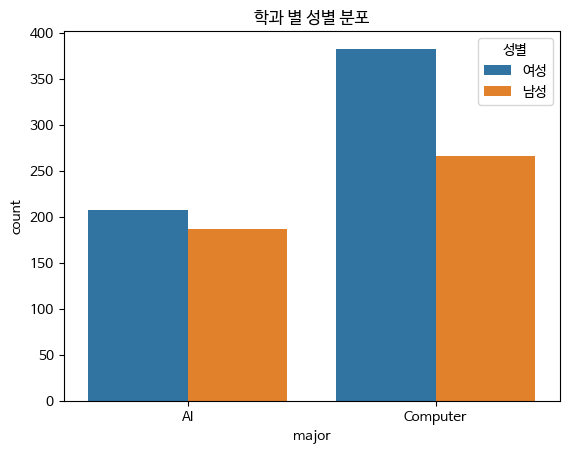

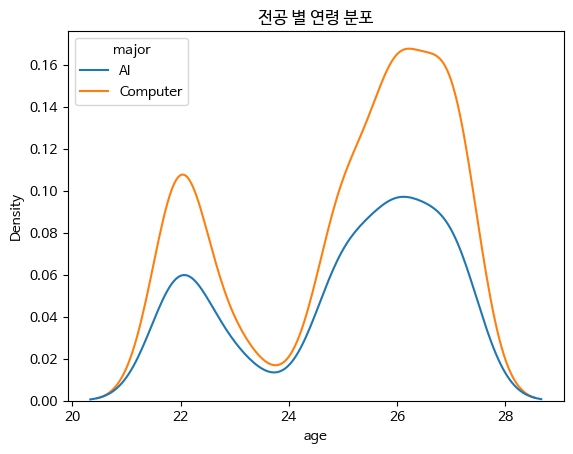

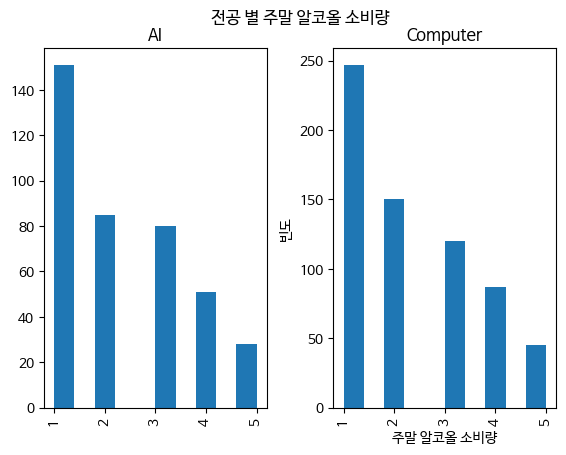

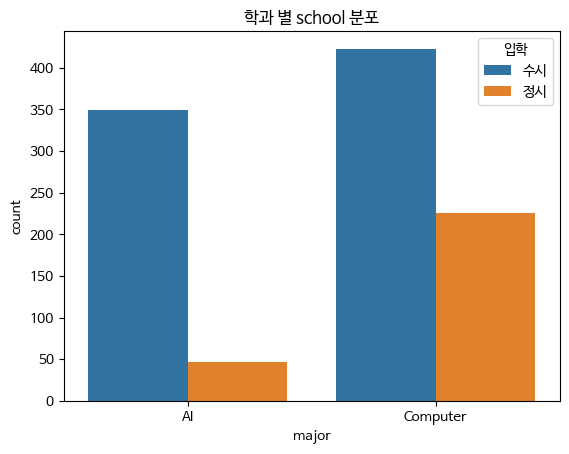

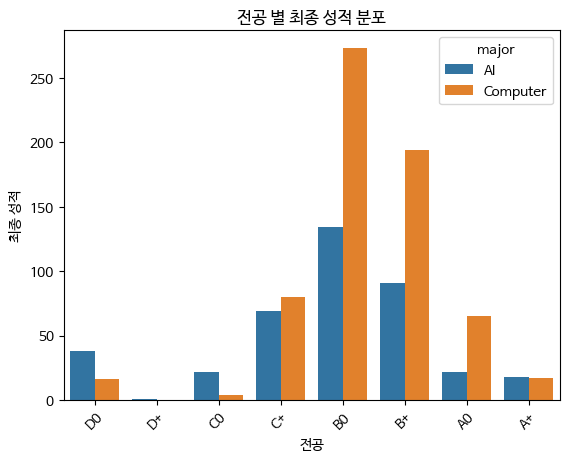

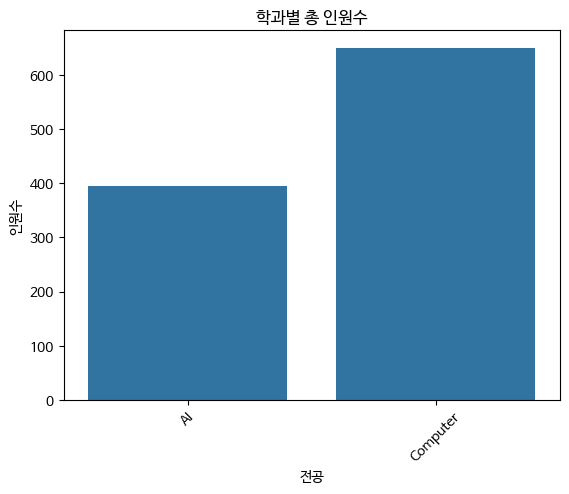

In [4]:
# 데이터 병합
students = pd.concat([student_ai, student_computer], ignore_index=True)

if 'Unnamed: 0' in students.columns:
    students = students.drop(['Unnamed: 0'], axis=1)

# 성별 분포 확인
sns.countplot(x='major', hue = "sex", data=students)
plt.title('학과 별 성별 분포')
# 범례 레이블 변경
plt.legend(title='성별', labels=['여성', '남성'])
plt.show()

sns.kdeplot(data=students, x='age', hue='major')
plt.title('전공 별 연령 분포')
plt.show()

students['Walc'].hist(by=students['major'])
plt.suptitle('전공 별 주말 알코올 소비량')
plt.xlabel('주말 알코올 소비량')
plt.ylabel('빈도')
plt.show()

sns.countplot(x='major', hue = "school", data=students)
plt.title('학과 별 school 분포')
# 범례 레이블 변경
plt.legend(title='입학', labels=['수시', '정시'])
plt.show()

# 평균 성적 계산
#students['average_grade'] = students[['G1', 'G2', 'G3']].mean(axis=1)

grade_order = ['D0', 'D+', 'C0', 'C+', 'B0', 'B+', 'A0', 'A+']
sns.countplot(x='G3', hue ="major", data=students, order=grade_order)
plt.title('전공 별 최종 성적 분포')
plt.xlabel('전공')
plt.ylabel('최종 성적')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

sns.countplot(x='major', data=students)
plt.title('학과별 총 인원수')
plt.xlabel('전공')
plt.ylabel('인원수')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

# 기타 필요한 EDA 진행
# 예: 인터넷 접근성, 가족 관계의 질, 학교 결석 횟수 등의 분포를 확인할 수 있습니다.
# 이진 카테고리형 변수 인코딩
students['sex'] = students['sex'].map({'F': 0, 'M': 1})
students['address'] = students['address'].map({'U': 0, 'R': 1})
#students['G3'] = students['G3'].map({'D0': 1.0, 'D+': 1.5, 'C0': 2.0, 'C+': 2.5, 'B0': 3.0, 'B+': 3.5, 'A0': 4.0, 'A+': 4.5})
# 기타 필요한 전처리 진행

모델 정확도: 57.42%
최적의 하이퍼파라미터: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}
최적 모델 정확도: 69.38%


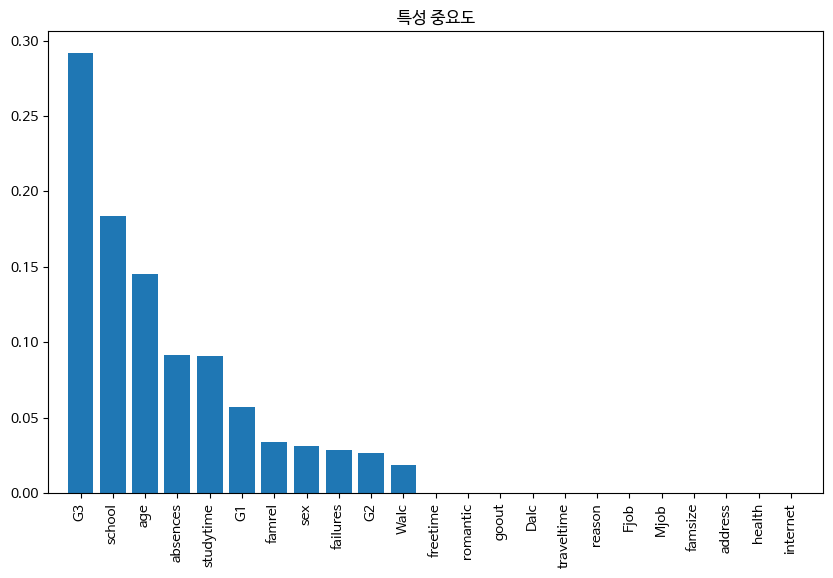

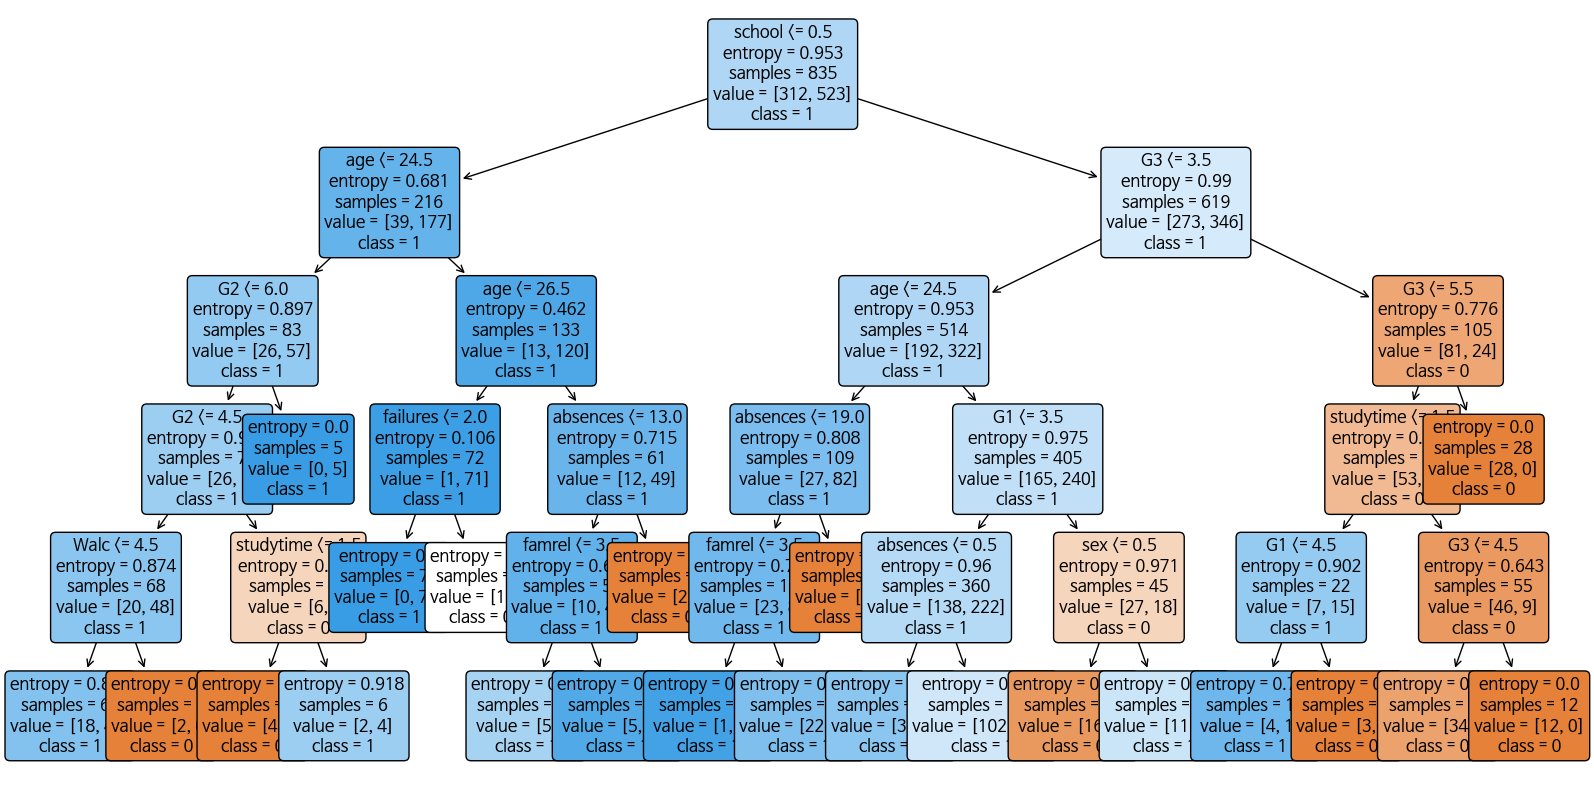

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

# CSV 파일 불러오기
student_ai = pd.read_csv('student-AI.csv')
student_computer = pd.read_csv('student-Computer.csv')

# keep_columns = ['G3', 'school', 'G1', 'G2', 'studytime', 'age', 'goout', 'sex', 'reason', 'Walc', 'failures', 'Fjob', 'famrel', 'Mjob', 'famsize', 'address', 'romantic', 'health']

# # 유지하고 싶은 컬럼을 제외한 나머지 컬럼 삭제
# student_ai = student_ai[keep_columns]
# student_computer = student_computer[keep_columns]


# 전공 컬럼 추가
student_ai['major'] = 'AI'
student_computer['major'] = 'Computer'
# 데이터 병합
students = pd.concat([student_ai, student_computer], ignore_index=True)

if 'Unnamed: 0' in students.columns:
    students = students.drop(['Unnamed: 0'], axis=1)

# 범주형 데이터 인코딩
encoder = LabelEncoder()
categorical_cols = students.select_dtypes(include=['object']).columns
for col in categorical_cols:
    students[col] = encoder.fit_transform(students[col])

# 특성과 레이블 분리
X = students.drop(['major'], axis=1)
y = students['major']

# 학습 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 예측 및 정확도 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'모델 정확도: {accuracy * 100:.2f}%')

# Decision Tree 모델을 위한 하이퍼파라미터 그리드 생성 및 튜닝 (이부분 숫자를 조정해보거나 하이퍼파라미터를 추가해보며 튜닝해보기)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력 및 최적 모델로 예측 및 평가
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'최적 모델 정확도: {accuracy * 100:.2f}%')

#특성 중요도 plot해보기
feature_importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10,6))
plt.title('특성 중요도')
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# plot tree 트리 시각화하여 확인하기
class_names_str = [str(cls) for cls in best_model.classes_]

plt.figure(figsize=(20, 10)) # 사이즈 조정
plot_tree(best_model,
          feature_names=X.columns,
          class_names=class_names_str,
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.svm import SVC

# CSV 파일 불러오기
student_ai = pd.read_csv('student-AI.csv')
student_computer = pd.read_csv('student-Computer.csv')


# 전공 컬럼 추가
student_ai['major'] = 'AI'
student_computer['major'] = 'Computer'
# 데이터 병합
students = pd.concat([student_ai, student_computer], ignore_index=True)

# Unnamed: 0이라는 불필요한 데이터가 생성됐다면 제거하기
if 'Unnamed: 0' in students.columns:
    students = students.drop(['Unnamed: 0'], axis=1)

# 범주형 데이터 인코딩
encoder = LabelEncoder()
categorical_cols = students.select_dtypes(include=['object']).columns
for col in categorical_cols:
    students[col] = encoder.fit_transform(students[col])

# 특성과 레이블 분리
X = students.drop(['major'], axis=1)
y = students['major']

# 학습 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM 모델 학습
model = SVC()
model.fit(X_train, y_train)

# 예측 및 정확도 평가
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'모델 정확도: {accuracy * 100:.2f}%')

# SVM 모델을 위한 하이퍼파라미터 그리드 생성 및 튜닝 (이부분 숫자를 조정해보거나 하이퍼파라미터를 추가해보며 튜닝해보기)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'sigmoid']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력 및 최적 모델로 예측 및 평가
print(f"최적의 하이퍼파라미터: {grid_search.best_params_}")
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'최적 모델 정확도: {accuracy * 100:.2f}%')

모델 정확도: 61.24%
최적의 하이퍼파라미터: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
최적 모델 정확도: 63.64%
